[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/MjdBh/ENSF619.2/blob/main/Assignment-01/assignment01.ipynb)





# Assignment #01

This assignment is composed of 4 tasks that your teams is supposed to propose a solution to these tasks that uses  the max-tree. The deliverable for this assignment is:

1. This jupyter-notebook completed with your solution. 
    - Create a GitHub repository and create a folder assignment-01. Put the jupyter-notebook with your solution in this repository and send the instructor the link. The same repository that your team created will be used for submitting the other assignments and your team final project.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 40% 
4. Quality of the results - 20%

More details about the assessment are available in the rubric document in the class GitHub repository.

*Teamates:*

**Behnam Nikbakht**

**Ali Salmani**

**Majid Bahrehvar**

In [ ]:
! git clone https://github.com/rmsouza01/ENSF619.2.git
! git clone https://github.com/rmsouza01/siamxt.git; cd siamxt; python setup.py install

Cloning into 'ENSF619.2'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 133 (delta 48), reused 104 (delta 23), pack-reused 0
Receiving objects: 100% (133/133), 30.16 MiB | 25.31 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Cloning into 'siamxt'...
remote: Enumerating objects: 218, done.
remote: Total 218 (delta 0), reused 0 (delta 0), pack-reused 218
Receiving objects: 100% (218/218), 3.92 MiB | 7.79 MiB/s, done.
Resolving deltas: 100% (119/119), done.
running install
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/siamxt
copying siamxt/__init__.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/max_tree_alpha.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/max_tree_c_01.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/max_tree_alpha_methods.py -> build/lib.linux-x86_64-3.7/siamxt
copyin

In [ ]:
import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

import siamxt  

**Part 1)** Using the max tree area signature analysis, determined CCs in the max tree
that separate Mona Lisa’s face from the background

(317, 213)


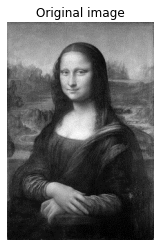

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/monalisa.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...



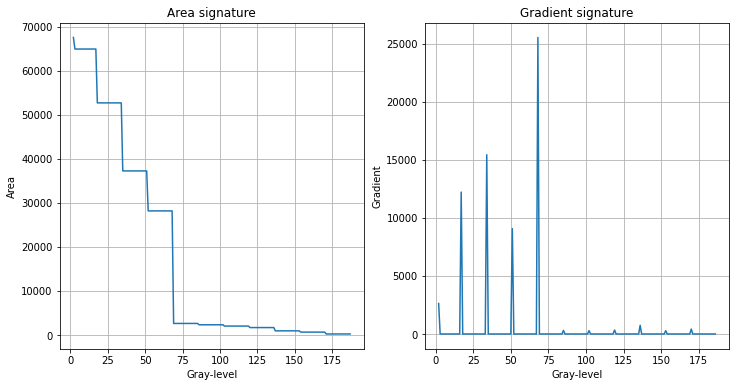

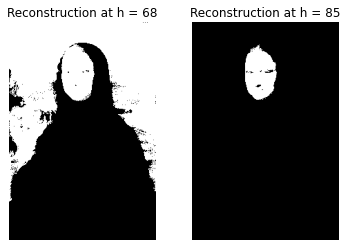

In [ ]:
Bc = np.ones((3, 3), dtype=bool)

max_tree = siamxt.MaxTreeAlpha(img, Bc)

# Hand-picked regional maxima
x, y = 50, 93

# Node corresponding to a regional maximum
node = max_tree.node_index[x, y]
area = max_tree.node_array[3, :]
# Area signature computation
levels, signature = max_tree.getSignature(area, node)

# Gradient of the area signature
gradient = signature[0:-1] - signature[1:]

# Display area signature
fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(levels, signature)
plt.grid()
plt.xlabel("Gray-level")
plt.ylabel("Area")
plt.title("Area signature")

# Display gradient of the area signature
plt.subplot(122)
plt.grid()
plt.plot(levels[0:-1], gradient)
plt.xlabel("Gray-level")
plt.ylabel("Gradient")
plt.title("Gradient signature")

# Selecting the first peak of the gradient
index = np.argsort(gradient)[::-1][0]

# reconstructing the node corresponding to the peak (largest area)
area1 = signature[index]
node1 = np.where(max_tree.node_array[3, :] == area1)[0][0]
cc1 = max_tree.recConnectedComponent(node1)

# reconstructing the node corresponding to the peak (smaller area)
area2 = signature[index + 2]
node2 = np.where(max_tree.node_array[3, :] == area2)[0][0]
cc2 = max_tree.recConnectedComponent(node2)

fig = plt.figure()
plt.subplot(121)
plt.imshow(cc1, cmap='Greys_r')
plt.axis('off')
plt.title("Reconstruction at h = %d" % max_tree.node_array[2, node1])

plt.subplot(122)
plt.imshow(cc2, cmap='Greys_r')
plt.axis('off')
plt.title("Reconstruction at h = %d" % max_tree.node_array[2, node2])
plt.show()

**Part 2)** Apply a series of filters to this image to segment the carotid arteries wall

Solution

>Steps

>>In order segment catots from whole of pictre,applied bounding box filter here.
We defined the bounding box filter with 6 parameters (i.e. Wmin, Wmax, Hmin, Hmax, rr_min, rr_max) . We wanted to allow a range of rr for our implementation using rr_min and rr_max.
We chose the appropriate values of the bounding box parameters (i.e. Wmin, Hmin, Wmax, Hmax, rr_min, rr_max) based on our empirical observation of the image-parts to be segmented (e.g. dimension of the arteries wall) and some further fine-tuning based on the observation of the outputs.
However, it was difficult to segment only the arteries wall removing all other components using this bounding box filter. 
We then applied extinction filter in orderd remove redundent objects
Thus we succeeded to segment the arteries walls only.

At last we draw circle around remaining objects.

Solution as follow:

(322, 322)


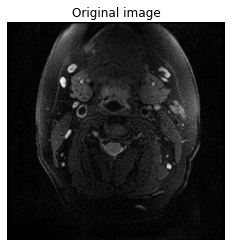

In [ ]:
#@title Default title text
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/carotid.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...

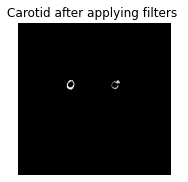

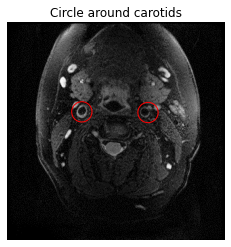

In [ ]:
# Structuring element with connectivity-8
Bc = np.ones((3, 3), dtype=bool)

# Building the max-tree of the image
mxt = siamxt.MaxTreeAlpha(img, Bc)

# Bounding box-lengths Xmax-Xmin
dx = mxt.node_array[7, :] - mxt.node_array[6, :]
# Bounding box-lengths Ymax-Ymin
dy = mxt.node_array[10, :] - mxt.node_array[9, :]

# Compute Rectangularity ratio
RR = mxt.computeRR()
# Filter parameters that obtained experimental
Wmin = 12  # Minimum bounding-box width
Wmax = 18  # Maximum bounding-box width
Hmin = 6  # Minimum bounding-box height
Hmax = 20  # Maximum bounding-box height

#Boundty of Rectangularity ratio
Rrmin = 0.30  # Minmum rectangularity ratio
Rrmax = 0.369  # Minimum rectangularity ratio


# Node selection criteria
nodes = (dx > Hmin) & (dx < Hmax) & (dy > Wmin) & (dy < Wmax) & (RR > Rrmin) & (RR < Rrmax)

# Filtering the max-tree based on node criteria
mxt.contractDR(nodes)

#After applying this filter we can see two redundent objects that we removed them by extinctionFilter
n = 3
ext = mxt.computeExtinctionValues(mxt.computeHeight(), "height")
mxt.extinctionFilter(ext, n)

# Recovering the filtered the image
img_filtered = mxt.getImage()

# Displaying the filtered image
fig = plt.figure()
plt.subplot(121)
plt.imshow(img_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("Carotid after applying filters ")

#Drawing cicle around carotids
# find non-zero pixels
non_zero = [np.argwhere(img_filtered > 0)[i] for i in {0, 10}]

fig, ax = plt.subplots(1)
ax.set_aspect('equal')
plt.axis('off')
plt.title('Circle around carotids')
ax.imshow(img, cmap='Greys_r')

for non_zero_point in non_zero:
    circle = plt.Circle(non_zero_point[::-1] + (0, 10), 15, color='r', fill=False, clip_on=False)
    ax.add_patch(circle)

plt.show()

**Parte 3)** Apply a series of filters to remove the white artifacts in the image

(320, 213)


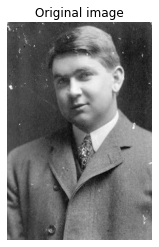

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/filtering-image.jpg").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...

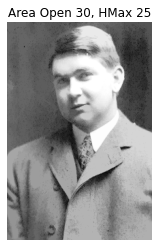

In [ ]:
bc = np.zeros((3,3), dtype=bool)
bc[1,:] = True
bc[:,1] = True

mxt = siamxt.MaxTreeAlpha(img,bc)

area = 30
hmax = 25

mxt.areaOpen(area)

mxt.hmax(hmax)

img_filtered =  mxt.getImage()

fig = plt.figure()

plt.subplot(122)
plt.imshow(img_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("Area Open {}, HMax {}".format(area,hmax))

plt.show()

**Part 4)** Apply a series of filters that will remove all objects in the image except for the
two pens

Solution:

>We experimented with different types of filters.
Experimenting with the extinction filter, we found that the pens exist in the top 6 extrema where the left pen comes 6th. Hence, by using extinction at n=6, we were able to remove all the objects except 6 extrema i.e. two pens and four other components.
We then experimented that objects at area 3 are pens, SEO then we removed other objects and hold pens.


---



(381, 384)


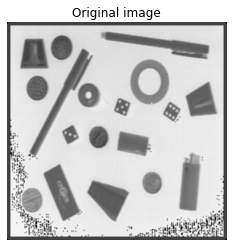

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/objects.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...

Nb. of extrema used to compute the profile:
[64, 32, 16, 8, 4, 2, 1]


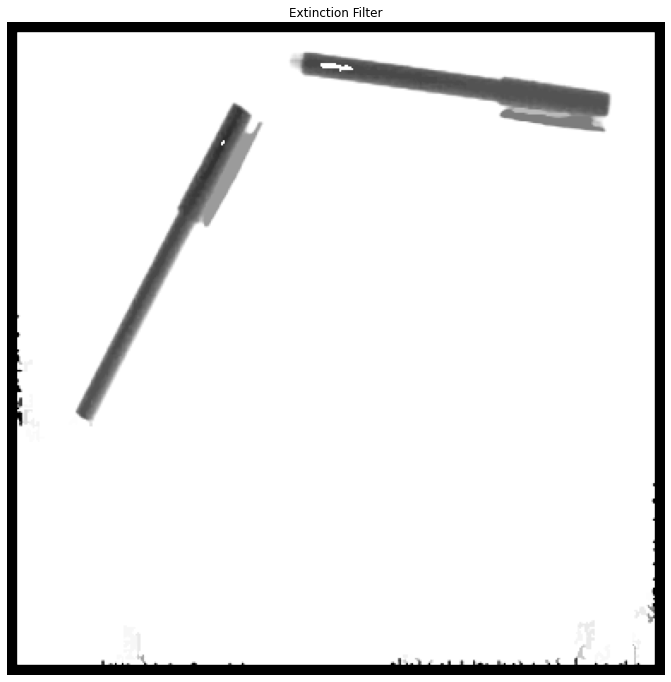

In [ ]:

#Structuring element. connectivity-4
Bc = np.zeros((3,3),dtype = bool)
Bc[1,:] = True
Bc[:,1] = True

# Parameters used to compute the extinction profile

nextrema =  [int(2**jj) for jj in range(7)][::-1]
print("Nb. of extrema used to compute the profile:")
print(nextrema)

# Negating the image
max_value = img.max()
img_neg = (max_value - img)

# Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(data_neg, Bc)

# Area attribute extraction and computation of area extinction values
area = mxt.node_array[3, :]
Aext = mxt.computeExtinctionValues(area, "area")

# Min-tree profile
i = len(nextrema) - 1
for n in nextrema:
    mxt2 = mxt.clone()
    mxt2.extinctionFilter(Aext, n)

    img1 = mxt2.getImage()

    RR = mxt2.computeRR()
    rr = 0.42
    nodes = (RR > rr)
    mxt2.contractDR(nodes)

    if i == 3:
        img3 = img1 - mxt2.getImage()
        image_filtered = max_value - img3

    i -= 1

# remove noise
mxt = siamxt.MaxTreeAlpha(image_filtered,Bc)
mxt.hmax(50)

image_filtered = mxt.getImage()

#Displaying the profile mosaic
fig = plt.figure()
plt.imshow(image_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("Extinction Filter")

plt.show()